# Modelo de predicción sismos EEUU

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Lectura de archivos shapefile

Archivo principal (.shp): Este archivo contiene la geometría de los objetos geoespaciales, como puntos, líneas o polígonos, en formato binario.  

Archivo de índice (.shx): Este archivo es un índice de acceso espacial que permite un acceso más rápido a los datos en el archivo principal (.shp). Contiene información sobre la ubicación de cada registro en el archivo principal.  

Archivo de atributos (.dbf): Este archivo almacena los atributos o datos no espaciales asociados a los objetos geoespaciales. Puede contener información como nombres, valores, fechas u otra información relevante.  
 
Archivo de metadatos (.prj): Este archivo almacena la información del sistema de referencia de coordenadas (CRS) utilizado en el archivo Shapefile. El CRS define cómo se interpreta y proyecta la geometría espacial en un sistema de coordenadas específico.  

# MAPA CENTRO Y ESTE

In [2]:
#Leo el shapefile con geopandas
gdf_zonasCE = gpd.read_file('Shapefiles\CEUS_1PctIn1Yr_5Hz.shp')

In [3]:
gdf_zonasCE.head()

,ValueRange,geometry
0,40 - 60,"POLYGON ((-786984.399 3286941.888, -788200.330..."
1,30 - 40,"POLYGON ((-773036.783 3305960.178, -772758.019..."
2,20 - 30,"POLYGON ((-766738.972 3314078.833, -765464.024..."
3,16 - 20,"POLYGON ((-769309.282 3323964.882, -768067.743..."
4,12 - 16,"POLYGON ((-762096.479 3328986.210, -760806.454..."


In [4]:
gdf_zonasCE.ValueRange.unique()

array(['40 - 60', '30 - 40', '20 - 30', '16 - 20', '12 - 16', '8 - 12',
       '6 - 8', '4 - 6', '< 2', '> 80', '60 - 80', '2 - 4'], dtype=object)

In [5]:
gdf_zonasCE.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ValueRange  65 non-null     object  
 1   geometry    65 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Definir la proyección de destino (proyección geográfica en grados decimales)
crs_destino = 'EPSG:4326'  # WGS84, utilizado comúnmente en coordenadas geográficas

# Convertir el GeoDataFrame de zonas a la proyección de destino
gdf_zonasCE = gdf_zonasCE.to_crs(crs_destino)

# Verificar el nuevo formato de los polígonos
print(gdf_zonasCE['geometry'])

0     POLYGON ((-103.28787 31.11885, -103.30000 31.1...
1     POLYGON ((-103.15886 31.30000, -103.15537 31.2...
2     POLYGON ((-103.10000 31.37753, -103.08522 31.3...
3     POLYGON ((-103.13594 31.46406, -103.12207 31.4...
4     POLYGON ((-103.06452 31.51452, -103.05000 31.5...
                            ...                        
60    MULTIPOLYGON (((-111.50471 37.75000, -111.5151...
61    POLYGON ((-105.10897 35.45515, -105.10625 35.4...
62    MULTIPOLYGON (((-107.11831 36.35000, -107.1130...
63    POLYGON ((-65.00000 48.06236, -65.00000 24.600...
64    POLYGON ((-65.00000 48.06236, -65.00199 48.051...
Name: geometry, Length: 65, dtype: geometry


# MAPA OESTE 

In [7]:
gdf_zonasW = gpd.read_file('Shapefiles\WUS_1PctIn1Yr_5Hz.shp')

In [8]:
gdf_zonasW.head()

,ValueRange,geometry
0,20 - 30,"POLYGON ((-1662039.603 3115326.005, -1659795.4..."
1,30 - 40,"POLYGON ((-1821368.340 3277822.480, -1823606.9..."
2,20 - 30,"POLYGON ((-1727780.469 3394543.335, -1727247.2..."
3,12 - 16,"POLYGON ((-1861635.333 3477092.816, -1862862.4..."
4,30 - 40,"POLYGON ((-1937339.330 3488399.977, -1938269.8..."


In [9]:
gdf_zonasW.ValueRange.unique()

array(['20 - 30', '30 - 40', '12 - 16', '8 - 12', '6 - 8', '60 - 80',
       '4 - 6', '> 80', '< 2', '40 - 60', '16 - 20', '2 - 4'],
      dtype=object)

In [10]:
gdf_zonasW.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ValueRange  73 non-null     object  
 1   geometry    73 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.3+ KB


In [11]:
# Definir la proyección de destino (proyección geográfica en grados decimales)
crs_destino = 'EPSG:4326'  # WGS84, utilizado comúnmente en coordenadas geográficas

# Convertir el GeoDataFrame de zonas a la proyección de destino
gdf_zonasW = gdf_zonasW.to_crs(crs_destino)

# Verificar el nuevo formato de los polígonos
print(gdf_zonasW['geometry'])

0     POLYGON ((-112.03461 28.53461, -112.01204 28.5...
1     POLYGON ((-113.95503 29.70502, -113.97747 29.7...
2     POLYGON ((-113.23537 30.90000, -113.22420 30.8...
3     POLYGON ((-114.78820 31.38820, -114.80000 31.3...
4     POLYGON ((-115.59407 31.34407, -115.60000 31.3...
                            ...                        
68    MULTIPOLYGON (((-111.19531 39.04844, -111.1988...
69    MULTIPOLYGON (((-105.69219 38.15156, -105.6812...
70    POLYGON ((-116.78563 50.00000, -116.79933 49.9...
71    MULTIPOLYGON (((-124.78926 39.21074, -124.7870...
72    POLYGON ((-101.67384 29.44503, -101.67031 29.4...
Name: geometry, Length: 73, dtype: geometry


# Junto los dos geodataframes

In [12]:
# Unir dos GeoDataFrames
gdf_zonas= gdf_zonasCE.append(gdf_zonasW, ignore_index=True)

C:\Users\claud\AppData\Local\Temp\ipykernel_8112\3050802443.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_zonas= gdf_zonasCE.append(gdf_zonasW, ignore_index=True)


In [13]:
gdf_zonas.head()

,ValueRange,geometry
0,40 - 60,"POLYGON ((-103.28787 31.11885, -103.30000 31.1..."
1,30 - 40,"POLYGON ((-103.15886 31.30000, -103.15537 31.2..."
2,20 - 30,"POLYGON ((-103.10000 31.37753, -103.08522 31.3..."
3,16 - 20,"POLYGON ((-103.13594 31.46406, -103.12207 31.4..."
4,12 - 16,"POLYGON ((-103.06452 31.51452, -103.05000 31.5..."


In [14]:
gdf_zonas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ValueRange  138 non-null    object  
 1   geometry    138 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 2.3+ KB


# SISMOS

In [15]:
df = pd.read_csv('../MACHINE_LEARNING/raw_usa.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142593 entries, 0 to 142592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   type                  142593 non-null  object 
 1   id                    142593 non-null  object 
 2   properties.mag        142593 non-null  float64
 3   properties.place      142490 non-null  object 
 4   properties.time       142593 non-null  object 
 5   properties.updated    142593 non-null  object 
 6   properties.tz         2 non-null       float64
 7   properties.url        142593 non-null  object 
 8   properties.detail     142593 non-null  object 
 9   properties.felt       23869 non-null   float64
 10  properties.cdi        23869 non-null   float64
 11  properties.mmi        6038 non-null    float64
 12  properties.alert      1235 non-null    object 
 13  properties.status     142593 non-null  object 
 14  properties.tsunami    142593 non-null  int64  
 15  

In [17]:
#Convierte las columnas de latitud y longitud en objetos de geometría de puntos utilizando la clase Point de la biblioteca shapely.
geometry = [Point(xy) for xy in zip(df['Longitud'], df['Latitud'])]
#Crea un GeoDataFrame a partir del DataFrame original y las geometrías de puntos.
gdf_sismos = gpd.GeoDataFrame(df, geometry=geometry)
#Utiliza el método to_file del GeoDataFrame para exportar el archivo Shapefile.
# output_shapefile = 'sismos_eeuu.shp'  # Nombre del archivo Shapefile de salida
# gdf_sismos.to_file(output_shapefile, driver='ESRI Shapefile')

In [18]:
df.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates,Longitud,Latitud,Profundidad
0,Feature,nc73888821,2.83,"58km WNW of Petrolia, CA",2023-05-16 16:22:09.380,2023-05-17 02:32:10.393,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.28,289.0,md,earthquake,"M 2.8 - 58km WNW of Petrolia, CA",Point,"[-124.9558334, 40.4253349, -0.37]",-124.955833,40.425335,-0.37
1,Feature,nc73888746,3.24,"2km NNE of Almanor, CA",2023-05-16 11:37:26.630,2023-05-16 23:58:52.060,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,18.0,...,0.20,33.0,ml,earthquake,"M 3.2 - 2km NNE of Almanor, CA",Point,"[-121.1678333, 40.2371667, 6.02]",-121.167833,40.237167,6.02
2,Feature,ok2023jmlz,2.98,"8 km NW of Prague, Oklahoma",2023-05-15 21:30:20.910,2023-05-16 00:59:31.375,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,6.0,...,0.14,34.0,ml,earthquake,"M 3.0 - 8 km NW of Prague, Oklahoma",Point,"[-96.74966667, 35.536, 7.81]",-96.749667,35.536000,7.81
3,Feature,nc73888511,2.60,"3km NNE of Prattville, CA",2023-05-15 17:38:58.740,2023-05-15 23:58:18.995,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,0.18,44.0,md,earthquake,"M 2.6 - 3km NNE of Prattville, CA",Point,"[-121.1428333, 40.2321667, 6.76]",-121.142833,40.232167,6.76
4,Feature,nc73888396,2.63,"41km W of Ferndale, CA",2023-05-15 11:35:46.410,2023-05-15 17:11:12.082,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.16,294.0,md,earthquake,"M 2.6 - 41km W of Ferndale, CA",Point,"[-124.7460022, 40.5270004, 20.25]",-124.746002,40.527000,20.25


In [19]:
gdf_sismos.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates,Longitud,Latitud,Profundidad,geometry
0,Feature,nc73888821,2.83,"58km WNW of Petrolia, CA",2023-05-16 16:22:09.380,2023-05-17 02:32:10.393,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,289.0,md,earthquake,"M 2.8 - 58km WNW of Petrolia, CA",Point,"[-124.9558334, 40.4253349, -0.37]",-124.955833,40.425335,-0.37,POINT (-124.95583 40.42533)
1,Feature,nc73888746,3.24,"2km NNE of Almanor, CA",2023-05-16 11:37:26.630,2023-05-16 23:58:52.060,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,18.0,...,33.0,ml,earthquake,"M 3.2 - 2km NNE of Almanor, CA",Point,"[-121.1678333, 40.2371667, 6.02]",-121.167833,40.237167,6.02,POINT (-121.16783 40.23717)
2,Feature,ok2023jmlz,2.98,"8 km NW of Prague, Oklahoma",2023-05-15 21:30:20.910,2023-05-16 00:59:31.375,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,6.0,...,34.0,ml,earthquake,"M 3.0 - 8 km NW of Prague, Oklahoma",Point,"[-96.74966667, 35.536, 7.81]",-96.749667,35.536000,7.81,POINT (-96.74967 35.53600)
3,Feature,nc73888511,2.60,"3km NNE of Prattville, CA",2023-05-15 17:38:58.740,2023-05-15 23:58:18.995,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,44.0,md,earthquake,"M 2.6 - 3km NNE of Prattville, CA",Point,"[-121.1428333, 40.2321667, 6.76]",-121.142833,40.232167,6.76,POINT (-121.14283 40.23217)
4,Feature,nc73888396,2.63,"41km W of Ferndale, CA",2023-05-15 11:35:46.410,2023-05-15 17:11:12.082,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,294.0,md,earthquake,"M 2.6 - 41km W of Ferndale, CA",Point,"[-124.7460022, 40.5270004, 20.25]",-124.746002,40.527000,20.25,POINT (-124.74600 40.52700)


In [20]:
gdf_sismos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 142593 entries, 0 to 142592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   type                  142593 non-null  object  
 1   id                    142593 non-null  object  
 2   properties.mag        142593 non-null  float64 
 3   properties.place      142490 non-null  object  
 4   properties.time       142593 non-null  object  
 5   properties.updated    142593 non-null  object  
 6   properties.tz         2 non-null       float64 
 7   properties.url        142593 non-null  object  
 8   properties.detail     142593 non-null  object  
 9   properties.felt       23869 non-null   float64 
 10  properties.cdi        23869 non-null   float64 
 11  properties.mmi        6038 non-null    float64 
 12  properties.alert      1235 non-null    object  
 13  properties.status     142593 non-null  object  
 14  properties.tsunami    142593

# Idea  
Con poligono.contains(punto), polygon y points genero una columna con el RangeValue del geodataframe de las zonas correspondientes

In [21]:
# Verifica el CRS de los GeoDataFrames
print(gdf_sismos.crs)
print(gdf_zonas.crs)

None
EPSG:4326


El resultado indica que el GeoDataFrame de los sismos (gdf_sismos) no tiene definido un sistema de referencia espacial (CRS), mientras que el GeoDataFrame de las zonas de riesgo (gdf_zonas) tiene un CRS definido.

In [22]:
# Asigna el CRS al GeoDataFrame de los sismos
gdf_sismos.set_crs(gdf_zonas.crs, inplace=True)

print(gdf_sismos.crs)
print(gdf_zonas.crs)


EPSG:4326
EPSG:4326


In [23]:
# Establece la columna de geometría en el GeoDataFrame de los sismos
gdf_sismos.set_geometry('geometry', inplace=True)

# Realiza la unión espacial
gdf_sismos_con_zonas = gpd.sjoin(gdf_sismos, gdf_zonas, how='left')

In [24]:
gdf_sismos_con_zonas.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.type,properties.title,geometry.type,geometry.coordinates,Longitud,Latitud,Profundidad,geometry,index_right,ValueRange
0,Feature,nc73888821,2.83,"58km WNW of Petrolia, CA",2023-05-16 16:22:09.380,2023-05-17 02:32:10.393,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,earthquake,"M 2.8 - 58km WNW of Petrolia, CA",Point,"[-124.9558334, 40.4253349, -0.37]",-124.955833,40.425335,-0.37,POINT (-124.95583 40.42533),109,40 - 60
1,Feature,nc73888746,3.24,"2km NNE of Almanor, CA",2023-05-16 11:37:26.630,2023-05-16 23:58:52.060,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,18.0,...,earthquake,"M 3.2 - 2km NNE of Almanor, CA",Point,"[-121.1678333, 40.2371667, 6.02]",-121.167833,40.237167,6.02,POINT (-121.16783 40.23717),106,20 - 30
2,Feature,ok2023jmlz,2.98,"8 km NW of Prague, Oklahoma",2023-05-15 21:30:20.910,2023-05-16 00:59:31.375,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,6.0,...,earthquake,"M 3.0 - 8 km NW of Prague, Oklahoma",Point,"[-96.74966667, 35.536, 7.81]",-96.749667,35.536000,7.81,POINT (-96.74967 35.53600),34,60 - 80
3,Feature,nc73888511,2.60,"3km NNE of Prattville, CA",2023-05-15 17:38:58.740,2023-05-15 23:58:18.995,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,earthquake,"M 2.6 - 3km NNE of Prattville, CA",Point,"[-121.1428333, 40.2321667, 6.76]",-121.142833,40.232167,6.76,POINT (-121.14283 40.23217),106,20 - 30
4,Feature,nc73888396,2.63,"41km W of Ferndale, CA",2023-05-15 11:35:46.410,2023-05-15 17:11:12.082,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,earthquake,"M 2.6 - 41km W of Ferndale, CA",Point,"[-124.7460022, 40.5270004, 20.25]",-124.746002,40.527000,20.25,POINT (-124.74600 40.52700),109,40 - 60


In [25]:
gdf_sismos_con_zonas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 142593 entries, 0 to 142592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   type                  142593 non-null  object  
 1   id                    142593 non-null  object  
 2   properties.mag        142593 non-null  float64 
 3   properties.place      142490 non-null  object  
 4   properties.time       142593 non-null  object  
 5   properties.updated    142593 non-null  object  
 6   properties.tz         2 non-null       float64 
 7   properties.url        142593 non-null  object  
 8   properties.detail     142593 non-null  object  
 9   properties.felt       23869 non-null   float64 
 10  properties.cdi        23869 non-null   float64 
 11  properties.mmi        6038 non-null    float64 
 12  properties.alert      1235 non-null    object  
 13  properties.status     142593 non-null  object  
 14  properties.tsunami    142593

In [26]:
# # Guardar el GeoDataFrame como CSV
# gdf_sismos_con_zonas.to_csv('Sismos_usa_ML.csv', index=False)

In [27]:
# # Guardar el GeoDataFrame como CSV
# gdf_sismos_con_zonas.to_file("Sismos_usa_ML.json", driver="GeoJSON")

In [28]:
# Convertir el GeoDataFrame a DataFrame
df = gdf_sismos_con_zonas.drop('geometry', axis=1)
df.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates,Longitud,Latitud,Profundidad,index_right,ValueRange
0,Feature,nc73888821,2.83,"58km WNW of Petrolia, CA",2023-05-16 16:22:09.380,2023-05-17 02:32:10.393,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,md,earthquake,"M 2.8 - 58km WNW of Petrolia, CA",Point,"[-124.9558334, 40.4253349, -0.37]",-124.955833,40.425335,-0.37,109,40 - 60
1,Feature,nc73888746,3.24,"2km NNE of Almanor, CA",2023-05-16 11:37:26.630,2023-05-16 23:58:52.060,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,18.0,...,ml,earthquake,"M 3.2 - 2km NNE of Almanor, CA",Point,"[-121.1678333, 40.2371667, 6.02]",-121.167833,40.237167,6.02,106,20 - 30
2,Feature,ok2023jmlz,2.98,"8 km NW of Prague, Oklahoma",2023-05-15 21:30:20.910,2023-05-16 00:59:31.375,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,6.0,...,ml,earthquake,"M 3.0 - 8 km NW of Prague, Oklahoma",Point,"[-96.74966667, 35.536, 7.81]",-96.749667,35.536000,7.81,34,60 - 80
3,Feature,nc73888511,2.60,"3km NNE of Prattville, CA",2023-05-15 17:38:58.740,2023-05-15 23:58:18.995,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,md,earthquake,"M 2.6 - 3km NNE of Prattville, CA",Point,"[-121.1428333, 40.2321667, 6.76]",-121.142833,40.232167,6.76,106,20 - 30
4,Feature,nc73888396,2.63,"41km W of Ferndale, CA",2023-05-15 11:35:46.410,2023-05-15 17:11:12.082,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,md,earthquake,"M 2.6 - 41km W of Ferndale, CA",Point,"[-124.7460022, 40.5270004, 20.25]",-124.746002,40.527000,20.25,109,40 - 60


In [29]:

df.drop(['type', 'id', 'properties.place', 'properties.time',
       'properties.updated', 'properties.tz', 'properties.url',
       'properties.detail', 'properties.felt', 'properties.status',
       'properties.tsunami', 'properties.net', "properties.magType",
       'properties.code', 'properties.ids', 'properties.sources',
       'properties.nst', 'properties.dmin','properties.title',
         'geometry.type', 'geometry.coordinates', 'properties.rms',
       'Longitud', 'Latitud', 'properties.types'], axis = 1, inplace=True)

## Aplicar método supervisado SVC  
El método de aprendizaje supervisado Support Vector Classification (SVC) es un algoritmo utilizado para clasificar datos en dos o más clases. El SVC se basa en la idea de encontrar un hiperplano óptimo que separe las clases en el espacio de características.

### Preparar las características (atributos)

In [30]:
df['properties.type'].unique()

array(['earthquake', 'mining explosion', 'quarry blast', 'explosion',
       'mine collapse', 'experimental explosion', 'other event',
       'rock burst', 'sonic boom', 'acoustic noise', 'landslide',
       'Rock Slide', 'chemical explosion', 'nuclear explosion'],
      dtype=object)

In [31]:
df = df.loc[df['properties.type'] != 'quarry blast']

En sismología, la profundidad de foco, profundidad focal o profundidad del hipocentro se refiere a la profundidad a la que ocurre un terremoto. Los terremotos que ocurren a una profundidad de menos de 70 kilómetros (43,5 mi) se clasifican como terremotos de foco superficial, mientras que aquellos con una profundidad focal entre 70 kilómetros (43,5 mi) y 300 kilómetros (186,4 mi) se denominan comúnmente terremotos de foco medio o profundidad intermedia.1​ En las zonas de subducción, donde la corteza oceánica más antigua y fría desciende debajo de otra placa tectónica, pueden ocurrir terremotos de foco profundo a profundidades mucho mayores en el manto, que van desde 300 kilómetros (186,4 mi) hasta 700 kilómetros (435 mi).

In [32]:
df_supervisado = df.copy()

In [33]:
df_supervisado.ValueRange.unique()

array(['40 - 60', '20 - 30', '60 - 80', '4 - 6', '8 - 12', '> 80',
       '16 - 20', '2 - 4', '6 - 8', '< 2', '30 - 40', '12 - 16'],
      dtype=object)

In [34]:
valores = {('60 - 80', '> 80'): 3, ('30 - 40', '40 - 60'): 2, ('12 - 16', '16 - 20', '20 - 30'): 1, ('2 - 4', '4 - 6', '6 - 8', '8 - 12'): 0}

In [35]:
df_supervisado['Nivel_probabilidad'] = df_supervisado['ValueRange'].map(lambda x: next((value for key, value in valores.items() if x in key), None))

In [36]:
df['CategoriaProfundidad'] = pd.cut(df['Profundidad'], bins=[0, 70, 300, 700], labels=['Superficial', 'Media', 'Profunda'], right=False)

In [37]:
rangos = {(-4, 70): 1, (70, 700): 0}

In [38]:
rangos

{(-4, 70): 1, (70, 700): 0}

In [39]:
df_supervisado['Peligrosidad'] = df_supervisado['Profundidad'].apply(lambda x: next((value for key, value in rangos.items() if key[0] < x <= key[1]), None))

probabilidad de peligrosidad = mapa peligrosidad *

En esta función:

La probabilidad de sismo por zona representa la base de la peligrosidad.  
La profundidad se utiliza como un factor exponencial inverso, lo que significa que a medida que aumenta la profundidad, disminuye la peligrosidad.  
La magnitud se eleva al cuadrado para aumentar su influencia en la peligrosidad.  

Peligrosidad = (Probabilidad de sismo por zona) * (1 + e^(-Profundidad)) * (Magnitud^2)

In [40]:
import math

def calcular_peligrosidad(probabilidad, profundidad, magnitud):
    return probabilidad * (1 + math.exp(-profundidad)) * (magnitud ** 2)

In [41]:
df_supervisado['Peligrosidad'] = df_supervisado.apply(lambda x: calcular_peligrosidad(x['Nivel_probabilidad'], x['Profundidad'], x['properties.mag']), axis=1)


In [63]:
# Definir los rangos o categorías para la discretización
bins = [-float('inf'), 20, 40, float('inf')]
# labels = ['Bajo', 'Moderado', 'Alto']
labels = [0, 1, 2]

# Discretizar la columna 'Peligrosidad'
df_supervisado['Peligrosidad_discretizada'] = pd.cut(df_supervisado['Peligrosidad'], bins=bins, labels=labels)

In [64]:
df_supervisado.dropna(inplace = True)

In [65]:
df_supervisado.head()

,properties.mag,properties.cdi,properties.mmi,properties.alert,properties.sig,properties.gap,properties.type,Profundidad,index_right,ValueRange,Nivel_probabilidad,Peligrosidad,Peligrosidad_discretizada
40,5.16,6.2,6.511,green,1030,37.0,earthquake,6.06,106,20 - 30,1.0,26.687755,1
56,5.48,6.1,6.436,green,1072,46.0,earthquake,5.85,106,20 - 30,1.0,30.116885,1
128,4.26,6.6,5.183,green,292,90.0,earthquake,1.89,75,60 - 80,3.0,62.667572,2
132,4.29,5.4,5.251,green,286,87.0,earthquake,1.88,75,60 - 80,3.0,63.637151,2
133,4.33,7.0,5.833,green,323,88.0,earthquake,2.04,75,60 - 80,3.0,63.560386,2


In [68]:
columnas_x = ['properties.mag',	'Profundidad', 'Nivel_probabilidad']
columnas_y = ['Peligrosidad_discretizada']

X = df_supervisado.loc[:, columnas_x]
y = np.ravel(df_supervisado.loc[:, columnas_y])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svm_rbf = SVC(kernel='rbf', random_state= 0)
svm_mo = svm_rbf.fit(X_train, y_train)

# Prediccion
y_pred_svm = svm_rbf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
accuracy_score(y_test,y_pred_svm)

[[97  1  0]
 [ 6 65  9]
 [ 0  3 86]]


0.9288389513108615

In [67]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Aplica la codificación de etiquetas a la columna con valores categóricos
X_train['Peligrosidad_discretizada'] = label_encoder.fit_transform(X_train['Peligrosidad_discretizada'])
X_test['Peligrosidad_discretizada'] = label_encoder.transform(X_test['Peligrosidad_discretizada'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [53]:
X_train

,properties.mag,Profundidad,Nivel_probabilidad
0,1.375458,0.242867,-0.629126
1,0.282922,0.447485,0.349514
2,-0.730157,-0.815719,1.328155
3,0.799393,0.284531,1.328155
4,-0.015043,0.241169,0.349514
...,...,...,...
793,0.660343,-1.033300,0.349514
794,-1.008257,-0.079184,1.328155
795,1.613829,3.495780,1.328155
796,0.938443,0.172037,0.349514


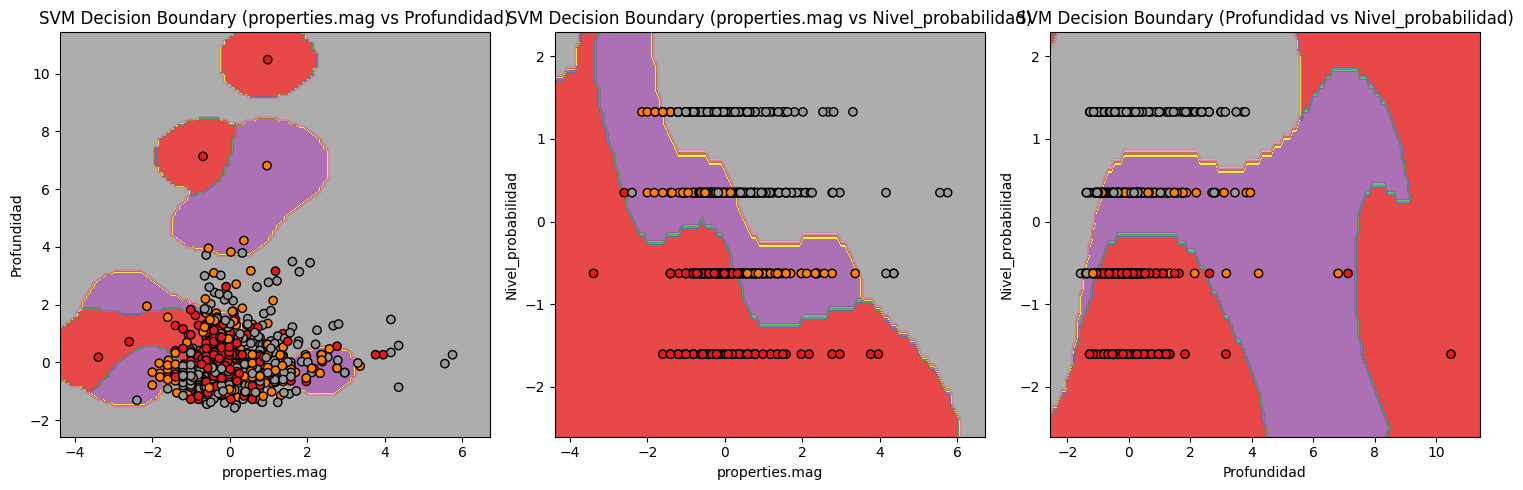

In [75]:
from itertools import combinations
from matplotlib.colors import ListedColormap

# Obtener todas las combinaciones de pares de características
feature_combinations = list(combinations(range(len(columnas_x)), 2))

# Crear subplots para cada combinación de características
fig, axs = plt.subplots(1, len(feature_combinations), figsize=(15, 5))

for i, (feat1, feat2) in enumerate(feature_combinations):
    # Obtener las características de la combinación actual
    X_subset = X_train.iloc[:, [feat1, feat2]].values
    # Entrenar el modelo SVM en la combinación de características actual
    svm_rbf_subset = SVC(kernel='rbf', random_state=0)
    svm_rbf_subset.fit(X_subset, y_train)

    # Crear una malla de puntos para la visualización
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Obtener los valores predichos para los puntos de la malla
    Z = svm_rbf_subset.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar las regiones de decisión y los puntos de entrenamiento
    axs[i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)

    axs[i].scatter(X_subset[:, 0], X_subset[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')

    # Etiquetas y título del gráfico
    axs[i].set_xlabel(columnas_x[feat1])
    axs[i].set_ylabel(columnas_x[feat2])
    axs[i].set_title(f'SVM Decision Boundary ({columnas_x[feat1]} vs {columnas_x[feat2]})')

# Ajustar los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()